In [130]:
%matplotlib inline

import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt

In [131]:
Directory = "4.21"
#Directory = "4.6/test_set_01"

In [132]:
def process_data(df, timerange):
    df.drop_duplicates(subset = 'Timestamp',inplace = True)
    # Peixuan: 将时间轴设为data的index
    df.set_index('Timestamp', inplace = True)
    # 10302019 to list
    # Peixuan: 将时间轴应用于index (用新的list re-index)
    df = df.reindex(timerange)
    # Peixuan: 插值
    df = df.apply(pd.Series.interpolate)
    # Peixuan: Fill NaN with 0
    df = df.fillna(0)
    df['Timestamp'] = df.index
    return df

In [133]:
# Function to measure fairness
# Using Jain's Fairness Index to measure

def measure_fairness_four_flow(raw_data_0, raw_data_1, raw_data_2, raw_data_3, period, step, fairness_list):
    raw_data_0.index = [i for i in range(150)]
    raw_data_1.index = [i for i in range(150)]
    raw_data_2.index = [i for i in range(150)]
    raw_data_3.index = [i for i in range(150)]
    
    raw_data_0['Short_th'] = raw_data_0['Data'].shift(step)
    raw_data_1['Short_th'] = raw_data_1['Data'].shift(step)
    raw_data_2['Short_th'] = raw_data_2['Data'].shift(step)
    raw_data_3['Short_th'] = raw_data_3['Data'].shift(step)

    period_0 = raw_data_0.fillna(0)
    period_1 = raw_data_1.fillna(0)
    period_2 = raw_data_2.fillna(0)
    period_3 = raw_data_3.fillna(0)

    period_0['Short_th'] = period_0['Data'] - period_0['Short_th']
    period_1['Short_th'] = period_1['Data'] - period_1['Short_th']
    period_2['Short_th'] = period_2['Data'] - period_2['Short_th']
    period_3['Short_th'] = period_3['Data'] - period_3['Short_th']

    period_0['Short_th'] = period_0['Short_th']/period
    period_1['Short_th'] = period_1['Short_th']/period
    period_2['Short_th'] = period_2['Short_th']/period
    period_3['Short_th'] = period_3['Short_th']/period


    merge_short_fairness = pd.DataFrame()
    
    merge_short_fairness['Timestamp'] = period_0['Timestamp']
    merge_short_fairness['Short_th_flow0'] = period_0['Short_th']
    merge_short_fairness['Short_th_flow1'] = period_1['Short_th']
    merge_short_fairness['Short_th_flow2'] = period_2['Short_th']
    merge_short_fairness['Short_th_flow3'] = period_3['Short_th']

    merge_short_fairness['numerator'] = merge_short_fairness.apply(lambda x: (x['Short_th_flow0']+x['Short_th_flow1']+x['Short_th_flow2']+x['Short_th_flow3'])*(x['Short_th_flow0']+x['Short_th_flow1']+x['Short_th_flow2']+x['Short_th_flow3']), axis=1)
    merge_short_fairness['denominator'] = merge_short_fairness.apply(lambda x: 4*(x['Short_th_flow0']*x['Short_th_flow0']+x['Short_th_flow1']*x['Short_th_flow1']+x['Short_th_flow2']*x['Short_th_flow2']+x['Short_th_flow3']*x['Short_th_flow3']), axis=1)

    merge_short_fairness['Short_fairness'] = merge_short_fairness.apply(lambda x: x['numerator']/x['denominator'], axis=1)
    merge_short_fairness.head()

       
    average_fairness = merge_short_fairness['Short_fairness'].mean()
    #print(average_fairness)
    fairness_list.append(average_fairness)
    

In [134]:
# Function to measure fairness
# Using Jain's Fairness Index to measure

def measure_fairness_three_flow(raw_data_0, raw_data_1, raw_data_2, period, step, fairness_list):
    raw_data_0.index = [i for i in range(150)]
    raw_data_1.index = [i for i in range(150)]
    raw_data_2.index = [i for i in range(150)]
    
    raw_data_0['Short_th'] = raw_data_0['Data'].shift(step)
    raw_data_1['Short_th'] = raw_data_1['Data'].shift(step)
    raw_data_2['Short_th'] = raw_data_2['Data'].shift(step)

    period_0 = raw_data_0.fillna(0)
    period_1 = raw_data_1.fillna(0)
    period_2 = raw_data_2.fillna(0)

    period_0['Short_th'] = period_0['Data'] - period_0['Short_th']
    period_1['Short_th'] = period_1['Data'] - period_1['Short_th']
    period_2['Short_th'] = period_2['Data'] - period_2['Short_th']

    period_0['Short_th'] = period_0['Short_th']/period
    period_1['Short_th'] = period_1['Short_th']/period
    period_2['Short_th'] = period_2['Short_th']/period

    merge_short_fairness = pd.DataFrame()
    
    merge_short_fairness['Short_th_flow0'] = period_0['Short_th']
    merge_short_fairness['Short_th_flow1'] = period_1['Short_th']
    merge_short_fairness['Short_th_flow2'] = period_2['Short_th']

    merge_short_fairness['numerator'] = merge_short_fairness.apply(lambda x: (x['Short_th_flow0']+x['Short_th_flow1']+x['Short_th_flow2'])*(x['Short_th_flow0']+x['Short_th_flow1']+x['Short_th_flow2']), axis=1)
    merge_short_fairness['denominator'] = merge_short_fairness.apply(lambda x: 3*(x['Short_th_flow0']*x['Short_th_flow0']+x['Short_th_flow1']*x['Short_th_flow1']+x['Short_th_flow2']*x['Short_th_flow2']), axis=1)

    merge_short_fairness['Short_fairness'] = merge_short_fairness.apply(lambda x: x['numerator']/x['denominator'], axis=1)
    merge_short_fairness.head()

       
    average_fairness = merge_short_fairness['Short_fairness'].mean()
    #print(average_fairness)
    fairness_list.append(average_fairness)

In [135]:
# Function to measure fairness
# Using Jain's Fairness Index to measure

def measure_fairness_two_flow(raw_data_0, raw_data_1, period, step, fairness_list):    
    
    raw_data_0.index = [i for i in range(150)]
    raw_data_1.index = [i for i in range(150)]
        
    raw_data_0['Short_th'] = raw_data_0['Data'].shift(step)
    raw_data_1['Short_th'] = raw_data_1['Data'].shift(step)

    period_0 = raw_data_0.fillna(0)
    period_1 = raw_data_1.fillna(0)

    period_0['Short_th'] = period_0['Data'] - period_0['Short_th']
    period_1['Short_th'] = period_1['Data'] - period_1['Short_th']

    period_0['Short_th'] = period_0['Short_th']/period
    period_1['Short_th'] = period_1['Short_th']/period

    merge_short_fairness = pd.DataFrame()
    
    merge_short_fairness['Short_th_flow0'] = period_0['Short_th']
    merge_short_fairness['Short_th_flow1'] = period_1['Short_th']
    
    #print(period_1['Short_th'])
    #print(merge_short_fairness['Short_th_flow1'])

    merge_short_fairness['numerator'] = merge_short_fairness.apply(lambda x: (x['Short_th_flow0']+x['Short_th_flow1'])*(x['Short_th_flow0']+x['Short_th_flow1']), axis=1)
    merge_short_fairness['denominator'] = merge_short_fairness.apply(lambda x: 2*(x['Short_th_flow0']*x['Short_th_flow0']+x['Short_th_flow1']*x['Short_th_flow1']), axis=1)

    merge_short_fairness['Short_fairness'] = merge_short_fairness.apply(lambda x: x['numerator']/x['denominator'], axis=1)
    merge_short_fairness.head()

       
    average_fairness = merge_short_fairness['Short_fairness'].mean()
    #print(average_fairness)
    fairness_list.append(average_fairness)

In [136]:
def measure_fairness_one_flow(raw_data_0, period, step, fairness_list):
    raw_data_0['Short_th'] = raw_data_0['Data'].shift(step)

    period_0 = raw_data_0.fillna(0)

    period_0['Short_th'] = period_0['Data'] - period_0['Short_th']

    period_0['Short_th'] = period_0['Short_th']/period

    merge_short_fairness = pd.DataFrame()

    merge_short_fairness['Timestamp'] = period_0['Timestamp']
    merge_short_fairness['Short_th_flow0'] = period_0['Short_th']

    merge_short_fairness['numerator'] = merge_short_fairness.apply(lambda x: (x['Short_th_flow0'])*(x['Short_th_flow0']), axis=1)
    merge_short_fairness['denominator'] = merge_short_fairness.apply(lambda x: (x['Short_th_flow0']*x['Short_th_flow0']), axis=1)

    merge_short_fairness['Short_fairness'] = merge_short_fairness.apply(lambda x: x['numerator']/x['denominator'], axis=1)
    merge_short_fairness.head()

       
    average_fairness = merge_short_fairness['Short_fairness'].mean()
    #print(average_fairness)
    fairness_list.append(average_fairness)
    

### Load Data

In [137]:
# Reading data

#Data Amount
# Peixuan: Read throughput data from the file, these throughput data are the accumulated throughput
# Peixuan: 尝试打印看看有几位小数 
raw_data_0_HCS = pd.read_table('%s/HCSPL/throughput_0.txt'%(Directory), header=None)
raw_data_0_HCS.columns = ['Timestamp', 'Throughput']
raw_data_1_HCS = pd.read_table('%s/HCSPL/throughput_1.txt'%(Directory), header=None)
raw_data_1_HCS.columns = ['Timestamp', 'Throughput']
raw_data_2_HCS = pd.read_table('%s/HCSPL/throughput_2.txt'%(Directory), header=None)
raw_data_2_HCS.columns = ['Timestamp', 'Throughput']
raw_data_3_HCS = pd.read_table('%s/HCSPL/throughput_3.txt'%(Directory), header=None)
raw_data_3_HCS.columns = ['Timestamp', 'Throughput']

#start_time = 0.01
#Peixuan: Starting time becomes 0.01, remember to check this for each simulation, they might be differet


#Data Amount
raw_data_0_AFQ10 = pd.read_table('%s/AFQ10PL/throughput_0.txt'%(Directory), header=None)
raw_data_0_AFQ10.columns = ['Timestamp', 'Throughput']
raw_data_1_AFQ10 = pd.read_table('%s/AFQ10PL/throughput_1.txt'%(Directory), header=None)
raw_data_1_AFQ10.columns = ['Timestamp', 'Throughput']
raw_data_2_AFQ10 = pd.read_table('%s/AFQ10PL/throughput_2.txt'%(Directory), header=None)
raw_data_2_AFQ10.columns = ['Timestamp', 'Throughput']
raw_data_3_AFQ10 = pd.read_table('%s/AFQ10PL/throughput_3.txt'%(Directory), header=None)
raw_data_3_AFQ10.columns = ['Timestamp', 'Throughput']

#start_time = 0.01


#Data Amount
raw_data_0_AFQ100 = pd.read_table('%s/AFQ100PL/throughput_0.txt'%(Directory), header=None)
raw_data_0_AFQ100.columns = ['Timestamp', 'Throughput']
raw_data_1_AFQ100 = pd.read_table('%s/AFQ100PL/throughput_1.txt'%(Directory), header=None)
raw_data_1_AFQ100.columns = ['Timestamp', 'Throughput']
raw_data_2_AFQ100 = pd.read_table('%s/AFQ100PL/throughput_2.txt'%(Directory), header=None)
raw_data_2_AFQ100.columns = ['Timestamp', 'Throughput']
raw_data_3_AFQ100 = pd.read_table('%s/AFQ100PL/throughput_3.txt'%(Directory), header=None)
raw_data_3_AFQ100.columns = ['Timestamp', 'Throughput']

#start_time = 0.01


#Data Amount
raw_data_0_AFQ1000 = pd.read_table('%s/AFQ1000PL/throughput_0.txt'%(Directory), header=None)
raw_data_0_AFQ1000.columns = ['Timestamp', 'Throughput']
raw_data_1_AFQ1000 = pd.read_table('%s/AFQ1000PL/throughput_1.txt'%(Directory), header=None)
raw_data_1_AFQ1000.columns = ['Timestamp', 'Throughput']
raw_data_2_AFQ1000 = pd.read_table('%s/AFQ1000PL/throughput_2.txt'%(Directory), header=None)
raw_data_2_AFQ1000.columns = ['Timestamp', 'Throughput']
raw_data_3_AFQ1000 = pd.read_table('%s/AFQ1000PL/throughput_3.txt'%(Directory), header=None)
raw_data_3_AFQ1000.columns = ['Timestamp', 'Throughput']

#start_time = 0.01

#Data Amount
'''
raw_data_0_DropTail = pd.read_table('%s/DropTail/throughput_0.txt'%(Directory), header=None)
raw_data_0_DropTail.columns = ['Timestamp', 'Throughput']
raw_data_1_DropTail = pd.read_table('%s/DropTail/throughput_1.txt'%(Directory), header=None)
raw_data_1_DropTail.columns = ['Timestamp', 'Throughput']
raw_data_2_DropTail = pd.read_table('%s/DropTail/throughput_2.txt'%(Directory), header=None)
raw_data_2_DropTail.columns = ['Timestamp', 'Throughput']
raw_data_3_DropTail = pd.read_table('%s/DropTail/throughput_3.txt'%(Directory), header=None)
raw_data_3_DropTail.columns = ['Timestamp', 'Throughput']
'''

#start_time = 0.01

#Data Amount
raw_data_0_PQ = pd.read_table('%s/PQPL/throughput_0.txt'%(Directory), header=None)
raw_data_0_PQ.columns = ['Timestamp', 'Throughput']
raw_data_1_PQ = pd.read_table('%s/PQPL/throughput_1.txt'%(Directory), header=None)
raw_data_1_PQ.columns = ['Timestamp', 'Throughput']
raw_data_2_PQ = pd.read_table('%s/PQPL/throughput_2.txt'%(Directory), header=None)
raw_data_2_PQ.columns = ['Timestamp', 'Throughput']
raw_data_3_PQ = pd.read_table('%s/PQPL/throughput_3.txt'%(Directory), header=None)
raw_data_3_PQ.columns = ['Timestamp', 'Throughput']

#start_time = 0.01

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  # Remove the CWD from sys.path while we load stuff.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  if sys.path[0] == '':
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
/Users/kathy/Documents/Anaconda3/

### Clean up data 

In [138]:
# Translate into data amount

start_time = 0.00001 # Peixuan: This is the starting time of the simulation, 
# Peixuan: try to make sure this with the first time stamp in the throughput_X.txt
#raw_data_0_HCS.head(1)

# Peixuan: here is use the average throughput multiple the time from the behginning of the simulation
# Peixuan: Average throughput * time = data transmitted
# Peixuan: So here is calculate the data transmitted so far

raw_data_0_HCS['Data'] = raw_data_0_HCS['Throughput']*(raw_data_0_HCS['Timestamp']-start_time)
raw_data_1_HCS['Data'] = raw_data_1_HCS['Throughput']*(raw_data_1_HCS['Timestamp']-start_time)
raw_data_2_HCS['Data'] = raw_data_2_HCS['Throughput']*(raw_data_2_HCS['Timestamp']-start_time)
raw_data_3_HCS['Data'] = raw_data_3_HCS['Throughput']*(raw_data_3_HCS['Timestamp']-start_time)

raw_data_0_AFQ10['Data'] = raw_data_0_AFQ10['Throughput']*(raw_data_0_AFQ10['Timestamp']-start_time)
raw_data_1_AFQ10['Data'] = raw_data_1_AFQ10['Throughput']*(raw_data_1_AFQ10['Timestamp']-start_time)
raw_data_2_AFQ10['Data'] = raw_data_2_AFQ10['Throughput']*(raw_data_2_AFQ10['Timestamp']-start_time)
raw_data_3_AFQ10['Data'] = raw_data_3_AFQ10['Throughput']*(raw_data_3_AFQ10['Timestamp']-start_time)

raw_data_0_AFQ100['Data'] = raw_data_0_AFQ100['Throughput']*(raw_data_0_AFQ100['Timestamp']-start_time)
raw_data_1_AFQ100['Data'] = raw_data_1_AFQ100['Throughput']*(raw_data_1_AFQ100['Timestamp']-start_time)
raw_data_2_AFQ100['Data'] = raw_data_2_AFQ100['Throughput']*(raw_data_2_AFQ100['Timestamp']-start_time)
raw_data_3_AFQ100['Data'] = raw_data_3_AFQ100['Throughput']*(raw_data_3_AFQ100['Timestamp']-start_time)

raw_data_0_AFQ1000['Data'] = raw_data_0_AFQ1000['Throughput']*(raw_data_0_AFQ1000['Timestamp']-start_time)
raw_data_1_AFQ1000['Data'] = raw_data_1_AFQ1000['Throughput']*(raw_data_1_AFQ1000['Timestamp']-start_time)
raw_data_2_AFQ1000['Data'] = raw_data_2_AFQ1000['Throughput']*(raw_data_2_AFQ1000['Timestamp']-start_time)
raw_data_3_AFQ1000['Data'] = raw_data_3_AFQ1000['Throughput']*(raw_data_3_AFQ1000['Timestamp']-start_time)

raw_data_0_PQ['Data'] = raw_data_0_PQ['Throughput']*(raw_data_0_PQ['Timestamp']-start_time)
raw_data_1_PQ['Data'] = raw_data_1_PQ['Throughput']*(raw_data_1_PQ['Timestamp']-start_time)
raw_data_2_PQ['Data'] = raw_data_2_PQ['Throughput']*(raw_data_2_PQ['Timestamp']-start_time)
raw_data_3_PQ['Data'] = raw_data_3_PQ['Throughput']*(raw_data_3_PQ['Timestamp']-start_time)

In [139]:
raw_data_1_HCS

,Timestamp,Throughput,Data
0,0.001507,0.000000e+00,0.000000
1,0.001521,2.285714e+04,34.537143
2,0.001523,5.400000e+05,817.020000
3,0.001537,5.653333e+05,863.264000
4,0.001539,7.900000e+05,1207.910000
5,0.001540,1.018182e+06,1557.818182
6,0.001541,1.232941e+06,1887.632941
7,0.001550,1.168372e+06,1799.293023
8,0.001551,1.330909e+06,2050.930909
9,0.001555,1.393333e+06,2152.700000


In [140]:
# Round up dec

dec = 5

raw_data_0_HCS = raw_data_0_HCS.round({'Timestamp':dec})
raw_data_1_HCS = raw_data_1_HCS.round({'Timestamp':dec})
raw_data_2_HCS = raw_data_2_HCS.round({'Timestamp':dec})
raw_data_3_HCS = raw_data_3_HCS.round({'Timestamp':dec})

raw_data_0_AFQ10 = raw_data_0_AFQ10.round({'Timestamp':dec})
raw_data_1_AFQ10 = raw_data_1_AFQ10.round({'Timestamp':dec})
raw_data_2_AFQ10 = raw_data_2_AFQ10.round({'Timestamp':dec})
raw_data_3_AFQ10 = raw_data_3_AFQ10.round({'Timestamp':dec})

raw_data_0_AFQ100 = raw_data_0_AFQ100.round({'Timestamp':dec})
raw_data_1_AFQ100 = raw_data_1_AFQ100.round({'Timestamp':dec})
raw_data_2_AFQ100 = raw_data_2_AFQ100.round({'Timestamp':dec})
raw_data_3_AFQ100 = raw_data_3_AFQ100.round({'Timestamp':dec})

raw_data_0_AFQ1000 = raw_data_0_AFQ1000.round({'Timestamp':dec})
raw_data_1_AFQ1000 = raw_data_1_AFQ1000.round({'Timestamp':dec})
raw_data_2_AFQ1000 = raw_data_2_AFQ1000.round({'Timestamp':dec})
raw_data_3_AFQ1000 = raw_data_3_AFQ1000.round({'Timestamp':dec})

raw_data_0_PQ = raw_data_0_PQ.round({'Timestamp':dec})
raw_data_1_PQ = raw_data_1_PQ.round({'Timestamp':dec})
raw_data_2_PQ = raw_data_2_PQ.round({'Timestamp':dec})
raw_data_3_PQ = raw_data_3_PQ.round({'Timestamp':dec})

In [141]:
# Peixuan: 确定时间轴(start, end, step)
timerange = np.linspace(0.00001, 0.012, 1200)
# Peixuan: 保留小数
timerange = np.around(timerange, decimals=5)
# 10302019 to list
# Peixuan: 转化时间轴(timerange)格式成为list
timerange = timerange.tolist()

In [142]:
raw_data_0_HCS = process_data(raw_data_0_HCS, timerange)
raw_data_1_HCS = process_data(raw_data_1_HCS, timerange)
raw_data_2_HCS = process_data(raw_data_2_HCS, timerange)
raw_data_3_HCS = process_data(raw_data_3_HCS, timerange)

raw_data_0_AFQ10 = process_data(raw_data_0_AFQ10, timerange)
raw_data_1_AFQ10 = process_data(raw_data_1_AFQ10, timerange)
raw_data_2_AFQ10 = process_data(raw_data_2_AFQ10, timerange)
raw_data_3_AFQ10 = process_data(raw_data_3_AFQ10, timerange)

raw_data_0_AFQ100 = process_data(raw_data_0_AFQ100, timerange)
raw_data_1_AFQ100 = process_data(raw_data_1_AFQ100, timerange)
raw_data_2_AFQ100 = process_data(raw_data_2_AFQ100, timerange)
raw_data_3_AFQ100 = process_data(raw_data_3_AFQ100, timerange)

raw_data_0_AFQ1000 = process_data(raw_data_0_AFQ1000, timerange)
raw_data_1_AFQ1000 = process_data(raw_data_1_AFQ1000, timerange)
raw_data_2_AFQ1000 = process_data(raw_data_2_AFQ1000, timerange)
raw_data_3_AFQ1000 = process_data(raw_data_3_AFQ1000, timerange)

raw_data_0_PQ = process_data(raw_data_0_PQ, timerange)
raw_data_1_PQ = process_data(raw_data_1_PQ, timerange)
raw_data_2_PQ = process_data(raw_data_2_PQ, timerange)
raw_data_3_PQ = process_data(raw_data_3_PQ, timerange)

In [143]:
#raw_data_1_AFQ10[(raw_data_1_AFQ10['Timestamp'] >= 0.00001) & (raw_data_1_AFQ10['Timestamp'] <= 0.00015)]

#raw_data_1_AFQ10[(raw_data_0_HCS['Timestamp'] >= 0.00001) & (raw_data_0_HCS['Timestamp'] < 0.00015)]
#raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.00015) & (raw_data_0_HCS['Timestamp'] < 0.0003)]
#raw_data_1_AFQ10[(raw_data_1_HCS['Timestamp'] >= 0.00016) & (raw_data_1_HCS['Timestamp'] < 0.0003)]
#raw_data_1_HCS[(raw_data_0_HCS['Timestamp'] >= 0.00015) & (raw_data_1_HCS['Timestamp'] < 0.0003)]

raw_data_1_HCS

,Throughput,Data,Timestamp
Timestamp,,,
0.00001,0.000000e+00,0.00000,0.00001
0.00002,0.000000e+00,0.00000,0.00002
0.00003,0.000000e+00,0.00000,0.00003
0.00004,0.000000e+00,0.00000,0.00004
0.00005,0.000000e+00,0.00000,0.00005
0.00006,0.000000e+00,0.00000,0.00006
0.00007,0.000000e+00,0.00000,0.00007
0.00008,0.000000e+00,0.00000,0.00008
0.00009,0.000000e+00,0.00000,0.00009


## Plotting 

### interval 1 - one flow 

In [144]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.00001) & (raw_data_0_HCS['Timestamp'] < 0.00015)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] >= 0.00001) & (raw_data_0_AFQ10['Timestamp'] < 0.0015)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] >= 0.00001) & (raw_data_0_AFQ100['Timestamp'] < 0.0015)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] >= 0.00001) & (raw_data_0_AFQ1000['Timestamp'] < 0.0015)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] >= 0.00001) & (raw_data_0_PQ['Timestamp'] < 0.0015)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]


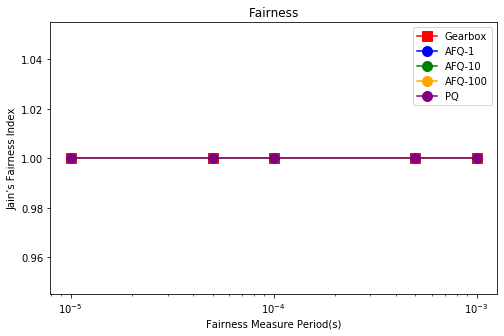

In [145]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()

### interval 2 - two flow 

In [146]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.0015) & (raw_data_0_HCS['Timestamp'] < 0.003)], raw_data_1_HCS[(raw_data_1_HCS['Timestamp'] >= 0.0015) & (raw_data_1_HCS['Timestamp'] < 0.003)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] >= 0.0015) & (raw_data_0_AFQ10['Timestamp'] < 0.003)], raw_data_1_AFQ10[(raw_data_1_AFQ10['Timestamp'] >= 0.0015) & (raw_data_1_AFQ10['Timestamp'] < 0.003)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] >= 0.0015) & (raw_data_0_AFQ100['Timestamp'] < 0.003)], raw_data_1_AFQ100[(raw_data_1_AFQ100['Timestamp'] >= 0.0015) & (raw_data_1_AFQ100['Timestamp'] < 0.003)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] >= 0.0015) & (raw_data_0_AFQ1000['Timestamp'] < 0.003)], raw_data_1_AFQ1000[(raw_data_1_AFQ1000['Timestamp'] >= 0.0015) & (raw_data_1_AFQ1000['Timestamp'] < 0.003)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] >= 0.0015) & (raw_data_0_PQ['Timestamp'] < 0.003)], raw_data_1_PQ[(raw_data_1_PQ['Timestamp'] >= 0.0015) & (raw_data_1_PQ['Timestamp'] < 0.003)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


[0.80597140792854871, 0.93421344310976884, 0.9299703457011772, 0.92271945415889911, 0.91002409823069608]
[0.94080227894956958, 0.93659883525207721, 0.93181909285785192, 0.92451821387403732, 0.91161243407070802]
[0.76920348979056974, 0.92132163044386306, 0.9193286496008598, 0.90839975378804338, 0.89610495610326213]
[0.54514295800919477, 0.8765528778153775, 0.91681858801398297, 0.90503402262248356, 0.89270104972448583]
[0.94080227894956958, 0.93659883525207721, 0.93181909285785192, 0.92451821387403732, 0.91161243407070802]


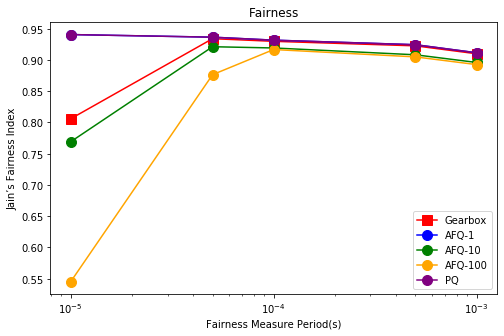

In [147]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()

### interval 3 - three flow

In [148]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.003) & (raw_data_0_HCS['Timestamp'] < 0.0045)], raw_data_1_HCS[(raw_data_1_HCS['Timestamp'] >= 0.003) & (raw_data_1_HCS['Timestamp'] < 0.0045)], raw_data_2_HCS[(raw_data_2_HCS['Timestamp'] >= 0.003) & (raw_data_2_HCS['Timestamp'] < 0.0045)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] >= 0.003) & (raw_data_0_AFQ10['Timestamp'] < 0.0045)], raw_data_1_AFQ10[(raw_data_1_AFQ10['Timestamp'] >= 0.003) & (raw_data_1_AFQ10['Timestamp'] < 0.0045)], raw_data_2_AFQ10[(raw_data_2_AFQ10['Timestamp'] >= 0.003) & (raw_data_2_AFQ10['Timestamp'] < 0.0045)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] >= 0.003) & (raw_data_0_AFQ100['Timestamp'] < 0.0045)], raw_data_1_AFQ100[(raw_data_1_AFQ100['Timestamp'] >= 0.003) & (raw_data_1_AFQ100['Timestamp'] < 0.0045)], raw_data_2_AFQ100[(raw_data_2_AFQ100['Timestamp'] >= 0.003) & (raw_data_2_AFQ100['Timestamp'] < 0.0045)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] >= 0.003) & (raw_data_0_AFQ1000['Timestamp'] < 0.0045)], raw_data_1_AFQ1000[(raw_data_1_AFQ1000['Timestamp'] >= 0.003) & (raw_data_1_AFQ1000['Timestamp'] < 0.0045)], raw_data_2_AFQ1000[(raw_data_2_AFQ1000['Timestamp'] >= 0.003) & (raw_data_2_AFQ1000['Timestamp'] < 0.0045)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] >= 0.003) & (raw_data_0_PQ['Timestamp'] < 0.0045)], raw_data_1_PQ[(raw_data_1_PQ['Timestamp'] >= 0.003) & (raw_data_1_PQ['Timestamp'] < 0.0045)], raw_data_2_PQ[(raw_data_2_PQ['Timestamp'] >= 0.003) & (raw_data_2_PQ['Timestamp'] < 0.0045)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

[0.63017484434343285, 0.87334694131822821, 0.87479040979652611, 0.8896830836974321, 0.88893453663679511]
[0.87418944478217853, 0.8757628524943486, 0.87730796068853045, 0.89172779289428228, 0.89032776534693914]
[0.66511005568117032, 0.84094429889011013, 0.83323625610264096, 0.84416312269051674, 0.85173180064233978]
[0.38436222783346302, 0.80501368468596279, 0.81474417275222855, 0.81026717812815474, 0.82352054965278421]
[0.87418944478217853, 0.8757628524943486, 0.87730796068853045, 0.89172779289428228, 0.89032776534693914]


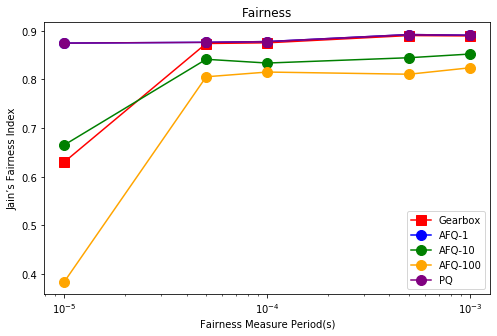

In [149]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()

### interval 4 - four flow

In [150]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_four_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.0045) & (raw_data_0_HCS['Timestamp'] < 0.006)], raw_data_1_HCS[(raw_data_1_HCS['Timestamp'] >= 0.0045) & (raw_data_1_HCS['Timestamp'] < 0.006)], raw_data_2_HCS[(raw_data_2_HCS['Timestamp'] >= 0.0045) & (raw_data_2_HCS['Timestamp'] < 0.006)], raw_data_3_HCS[(raw_data_3_HCS['Timestamp'] >= 0.0045) & (raw_data_3_HCS['Timestamp'] < 0.006)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_four_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] >= 0.0045) & (raw_data_0_AFQ10['Timestamp'] < 0.006)], raw_data_1_AFQ10[(raw_data_1_AFQ10['Timestamp'] >= 0.0045) & (raw_data_1_AFQ10['Timestamp'] < 0.006)], raw_data_2_AFQ10[(raw_data_2_AFQ10['Timestamp'] >= 0.0045) & (raw_data_2_AFQ10['Timestamp'] < 0.006)], raw_data_3_AFQ10[(raw_data_3_AFQ10['Timestamp'] >= 0.0045) & (raw_data_3_AFQ10['Timestamp'] < 0.006)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_four_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] >= 0.0045) & (raw_data_0_AFQ100['Timestamp'] < 0.006)], raw_data_1_AFQ100[(raw_data_1_AFQ100['Timestamp'] >= 0.0045) & (raw_data_1_AFQ100['Timestamp'] < 0.006)], raw_data_2_AFQ100[(raw_data_2_AFQ100['Timestamp'] >= 0.0045) & (raw_data_2_AFQ100['Timestamp'] < 0.006)], raw_data_3_AFQ100[(raw_data_3_AFQ100['Timestamp'] >= 0.0045) & (raw_data_3_AFQ100['Timestamp'] < 0.006)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_four_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] >= 0.0045) & (raw_data_0_AFQ1000['Timestamp'] < 0.006)], raw_data_1_AFQ1000[(raw_data_1_AFQ1000['Timestamp'] >= 0.0045) & (raw_data_1_AFQ1000['Timestamp'] < 0.006)], raw_data_2_AFQ1000[(raw_data_2_AFQ1000['Timestamp'] >= 0.0045) & (raw_data_2_AFQ1000['Timestamp'] < 0.006)], raw_data_3_AFQ1000[(raw_data_3_AFQ1000['Timestamp'] >= 0.0045) & (raw_data_3_AFQ1000['Timestamp'] < 0.006)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_four_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] >= 0.0045) & (raw_data_0_PQ['Timestamp'] < 0.006)], raw_data_1_PQ[(raw_data_1_PQ['Timestamp'] >= 0.0045) & (raw_data_1_PQ['Timestamp'] < 0.006)], raw_data_2_PQ[(raw_data_2_PQ['Timestamp'] >= 0.0045) & (raw_data_2_PQ['Timestamp'] < 0.006)], raw_data_3_PQ[(raw_data_3_PQ['Timestamp'] >= 0.0045) & (raw_data_3_PQ['Timestamp'] < 0.006)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a 

[0.4157137091754281, 0.7141285073997149, 0.82674502496557589, 0.85419602208141121, 0.8629065491055451]
[0.83203810661207889, 0.83213658003952995, 0.83606456138091045, 0.86147325504151717, 0.867870225855637]
[0.5452904784755559, 0.77417018658075842, 0.77837644983105914, 0.80676630053586462, 0.82608796190600853]
[0.19822106541669554, 0.55127615691824861, 0.67087436882503493, 0.71530396277533115, 0.75978597762215294]
[0.83203810661207889, 0.83213658003952995, 0.83606456138091045, 0.86147325504151717, 0.867870225855637]


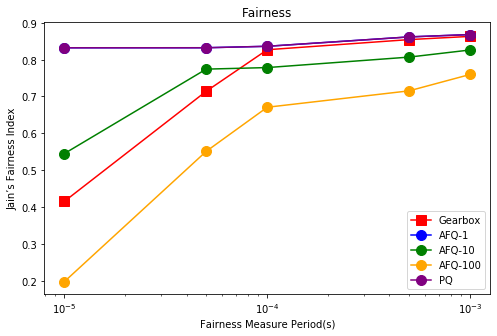

In [151]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()

### interval 5 - three flow 

In [152]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.006) & (raw_data_0_HCS['Timestamp'] < 0.0075)], raw_data_1_HCS[(raw_data_1_HCS['Timestamp'] >= 0.006) & (raw_data_1_HCS['Timestamp'] < 0.0075)], raw_data_2_HCS[(raw_data_2_HCS['Timestamp'] >= 0.006) & (raw_data_2_HCS['Timestamp'] < 0.0075)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] >= 0.006) & (raw_data_0_AFQ10['Timestamp'] < 0.0075)], raw_data_1_AFQ10[(raw_data_1_AFQ10['Timestamp'] >= 0.006) & (raw_data_1_AFQ10['Timestamp'] < 0.0075)], raw_data_2_AFQ10[(raw_data_2_AFQ10['Timestamp'] >= 0.006) & (raw_data_2_AFQ10['Timestamp'] < 0.0075)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] >= 0.006) & (raw_data_0_AFQ100['Timestamp'] < 0.0075)], raw_data_1_AFQ100[(raw_data_1_AFQ100['Timestamp'] >= 0.006) & (raw_data_1_AFQ100['Timestamp'] < 0.0075)], raw_data_2_AFQ100[(raw_data_2_AFQ100['Timestamp'] >= 0.006) & (raw_data_2_AFQ100['Timestamp'] < 0.0075)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] >= 0.006) & (raw_data_0_AFQ1000['Timestamp'] < 0.0075)], raw_data_1_AFQ1000[(raw_data_1_AFQ1000['Timestamp'] >= 0.006) & (raw_data_1_AFQ1000['Timestamp'] < 0.0075)], raw_data_2_AFQ1000[(raw_data_2_AFQ1000['Timestamp'] >= 0.006) & (raw_data_2_AFQ1000['Timestamp'] < 0.0075)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] >= 0.006) & (raw_data_0_PQ['Timestamp'] < 0.0075)], raw_data_1_PQ[(raw_data_1_PQ['Timestamp'] >= 0.006) & (raw_data_1_PQ['Timestamp'] < 0.0075)], raw_data_2_PQ[(raw_data_2_PQ['Timestamp'] >= 0.006) & (raw_data_2_PQ['Timestamp'] < 0.0075)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

[0.85488241617395277, 0.9949501253530445, 0.99398625617594805, 0.98071013733116352, 0.96604347467871188]
[0.98441399625904979, 0.99540250094889837, 0.99407040024238424, 0.98071758279923571, 0.96609413595871196]
[0.87958727607988219, 0.99414839111694087, 0.99350452098081099, 0.97968995293115524, 0.96446447935926127]
[0.63446517400044644, 0.98179940590430215, 0.99124411763913034, 0.97918368946065693, 0.96376570525877681]
[0.98441399625904979, 0.99540250094889837, 0.99407040024238424, 0.98071758279923571, 0.96609413595871196]


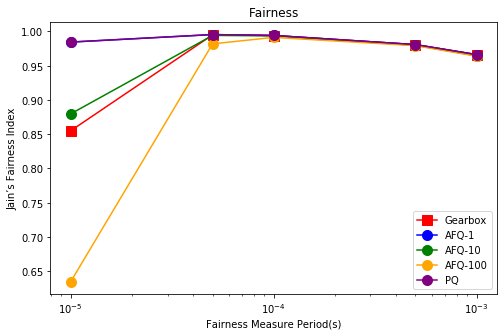

In [153]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()

### interval 6 - two flow

In [154]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.0075) & (raw_data_0_HCS['Timestamp'] < 0.009)], raw_data_1_HCS[(raw_data_1_HCS['Timestamp'] >= 0.0075) & (raw_data_1_HCS['Timestamp'] < 0.009)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] >= 0.0075) & (raw_data_0_AFQ10['Timestamp'] < 0.009)], raw_data_1_AFQ10[(raw_data_1_AFQ10['Timestamp'] >= 0.0075) & (raw_data_1_AFQ10['Timestamp'] < 0.009)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] >= 0.0075) & (raw_data_0_AFQ100['Timestamp'] < 0.009)], raw_data_1_AFQ100[(raw_data_1_AFQ100['Timestamp'] >= 0.0075) & (raw_data_1_AFQ100['Timestamp'] < 0.009)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] >= 0.0075) & (raw_data_0_AFQ1000['Timestamp'] < 0.009)], raw_data_1_AFQ1000[(raw_data_1_AFQ1000['Timestamp'] >= 0.0075) & (raw_data_1_AFQ1000['Timestamp'] < 0.009)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] >= 0.0075) & (raw_data_0_PQ['Timestamp'] < 0.009)], raw_data_1_PQ[(raw_data_1_PQ['Timestamp'] >= 0.0075) & (raw_data_1_PQ['Timestamp'] < 0.0003)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


[0.94211818942664538, 0.99774582983923776, 0.99767479488040367, 0.99234214028089662, 0.98671482911735664]
[0.99523377017745318, 0.99828970248899362, 0.99766500063802332, 0.99235235182131565, 0.98673705644745813]
[0.92703945249950304, 0.99385443525208528, 0.99759276397456653, 0.99216512476703089, 0.98637691268613936]
[0.79069144423963311, 0.9791486889100941, 0.99756063354351343, 0.99226506362315947, 0.98654069038327041]


ValueError: Length mismatch: Expected axis has 15 elements, new values have 150 elements

In [ ]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()

### interval 7 - one flow  

In [ ]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] > 0.009)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] > 0.009)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] > 0.009)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] > 0.009)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] > 0.009)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

In [ ]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()